In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv('/content/Housing.csv')
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.dropna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
#Simple  Linear Regression
X_simple = df[['area']] #Here feature is area
y = df['price']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)


In [6]:
#Multiple Linear Regression
X_multi = df[['area', 'bedrooms', 'bathrooms']]  #Here features is area,bedrooms,bathrooms
y_multi = df['price']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)


In [7]:
#Simple  Linear Regression
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)


LinearRegression()

In [8]:
#Multiple Linear Regression
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)


LinearRegression()

In [9]:
y_pred_s = model_simple.predict(X_test_s)


In [10]:
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("R²:", r2_score(y_test_s, y_pred_s))


MAE: 1474748.1337969352
MSE: 3675286604768.185
R²: 0.27287851871974644


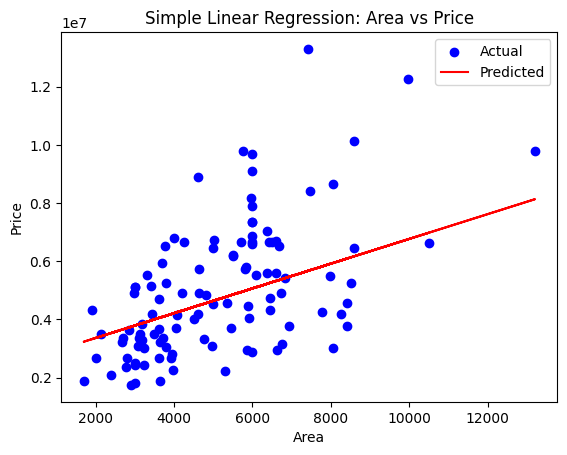

In [11]:
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()


In [12]:
print("Simple Coefficient:", model_simple.coef_)
print("Simple Intercept:", model_simple.intercept_)
coeff_df = pd.DataFrame(model_multi.coef_, index=X_multi.columns, columns=['Coefficient'])
print(coeff_df)


Simple Coefficient: [425.72984194]
Simple Intercept: 2512254.2639593435
            Coefficient
area       3.454666e+02
bedrooms   3.601977e+05
bathrooms  1.422320e+06
